In [1]:
from extract_alert_data import date_times,locations,all_locations_unique,location_alert_distribution
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
def fix_weekday(x):
    return (x.weekday()+1)%7+1

Text(0.5, 1.0, 'alert distribution over the week')

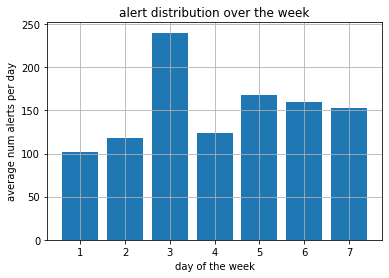

In [20]:
# -- with 17/10 --

min_date = min(date_times).date()
max_date = max(date_times).date()
day_count = (max_date - min_date).days + 1
weekdays = [fix_weekday(dt) for dt in (min_date + datetime.timedelta(n) for n in range(day_count))]

alert_weekdays = [fix_weekday(dt) for dt in date_times]
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))
hist_num_weekdays_in_timespan,_ = np.histogram(weekdays,np.linspace(0.5,7.5,8,endpoint=True))
plt.bar(range(1,8),hist/hist_num_weekdays_in_timespan)
plt.grid()
plt.xlabel("day of the week")
plt.ylabel("average num alerts per day")
plt.title("alert distribution over the week")

Text(0.5, 1.0, 'alert distribution over time')

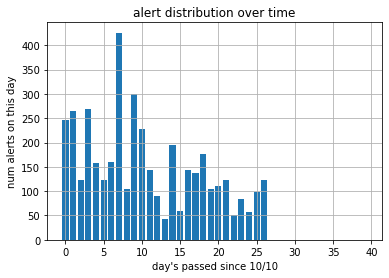

In [27]:
alert_month_days = [(dt - min(date_times)).days for dt in date_times ]
hist,_ = np.histogram(alert_month_days,np.arange(-0.5,40.5,1))
plt.bar(range(0,len(hist)),hist)
plt.grid()
plt.xlabel("day's passed since 10/10")
plt.ylabel("num alerts on this day")
plt.title("alert distribution over time")

Text(0.5, 1.0, 'alert distribution over the week when removing the outlier 17/10')

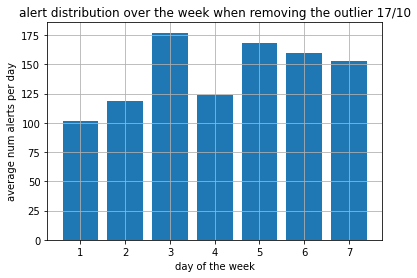

In [21]:
# -- with 17/10 --

min_date = min(date_times).date()
max_date = max(date_times).date()
day_count = (max_date - min_date).days + 1
weekdays = [fix_weekday(dt) for dt in (min_date + datetime.timedelta(n) for n in range(day_count)) if dt.day != 17]

alert_weekdays = [fix_weekday(dt) for dt in date_times if dt.day != 17]
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))
hist_num_weekdays_in_timespan,_ = np.histogram(weekdays,np.linspace(0.5,7.5,8,endpoint=True))
plt.bar(range(1,8),hist/hist_num_weekdays_in_timespan)

plt.grid()
plt.xlabel("day of the week")
plt.ylabel("average num alerts per day")
plt.title("alert distribution over the week when removing the outlier 17/10")